# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.ticker import FixedFormatter, FixedLocator


In [69]:
sinasc = pd.read_csv('M6.csv')
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [70]:
sinasc = sinasc[['APGAR1',
                'APGAR5',
                'SEXO',
                'GESTACAO',
                'ESTCIVMAE',
                'CONSULTAS']]

sinasc.dropna()
sinasc

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE,CONSULTAS
0,9.0,10.0,Masculino,37 a 41 semanas,5.0,4
1,8.0,9.0,Feminino,37 a 41 semanas,2.0,4
2,8.0,10.0,Feminino,37 a 41 semanas,9.0,4
3,9.0,10.0,Feminino,37 a 41 semanas,5.0,3
4,8.0,10.0,Feminino,37 a 41 semanas,2.0,4
...,...,...,...,...,...,...
27023,8.0,9.0,Masculino,32 a 36 semanas,2.0,4
27024,8.0,9.0,Masculino,37 a 41 semanas,1.0,4
27025,9.0,10.0,Masculino,37 a 41 semanas,2.0,4
27026,8.0,9.0,Masculino,32 a 36 semanas,2.0,4


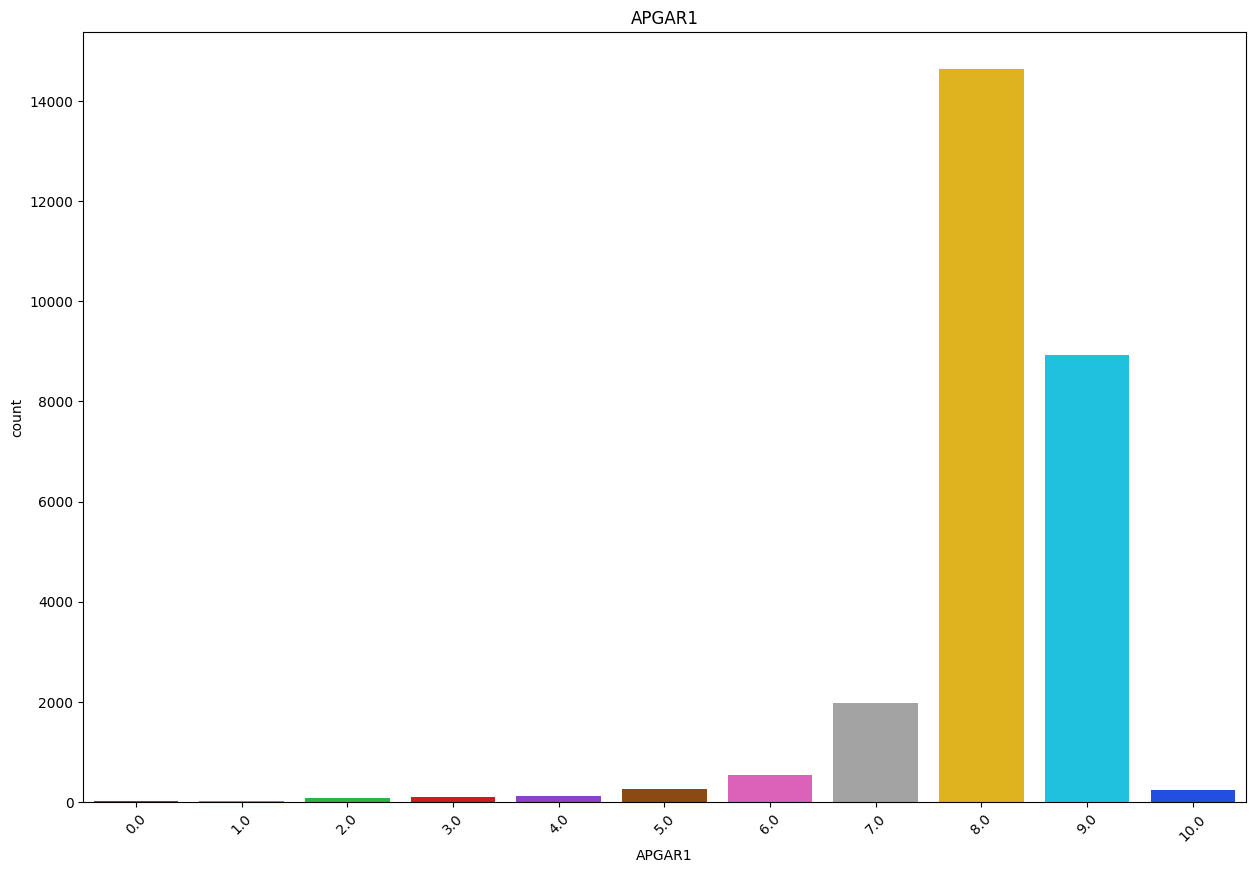

In [92]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))

sns.countplot(x='APGAR1', hue='APGAR1', data=sinasc, ax=axes, palette='bright', legend=False)
axes.set_xticks(axes.get_xticks())
axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
axes.set_title('APGAR1')

plt.show()

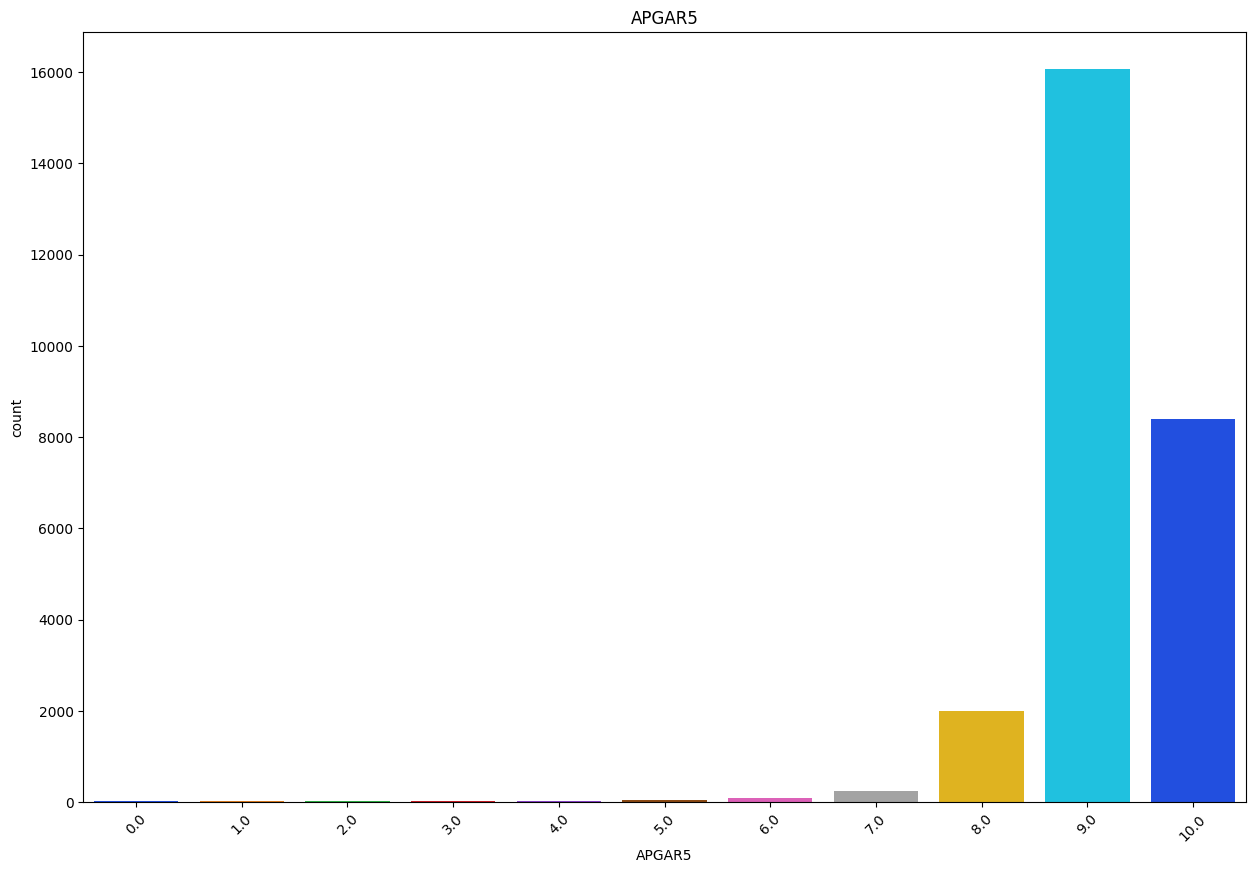

In [94]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))

sns.countplot(x='APGAR5', hue='APGAR5', data=sinasc, ax=axes, palette='bright', legend=False)
axes.set_xticks(axes.get_xticks())
axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
axes.set_title('APGAR5')

plt.show()

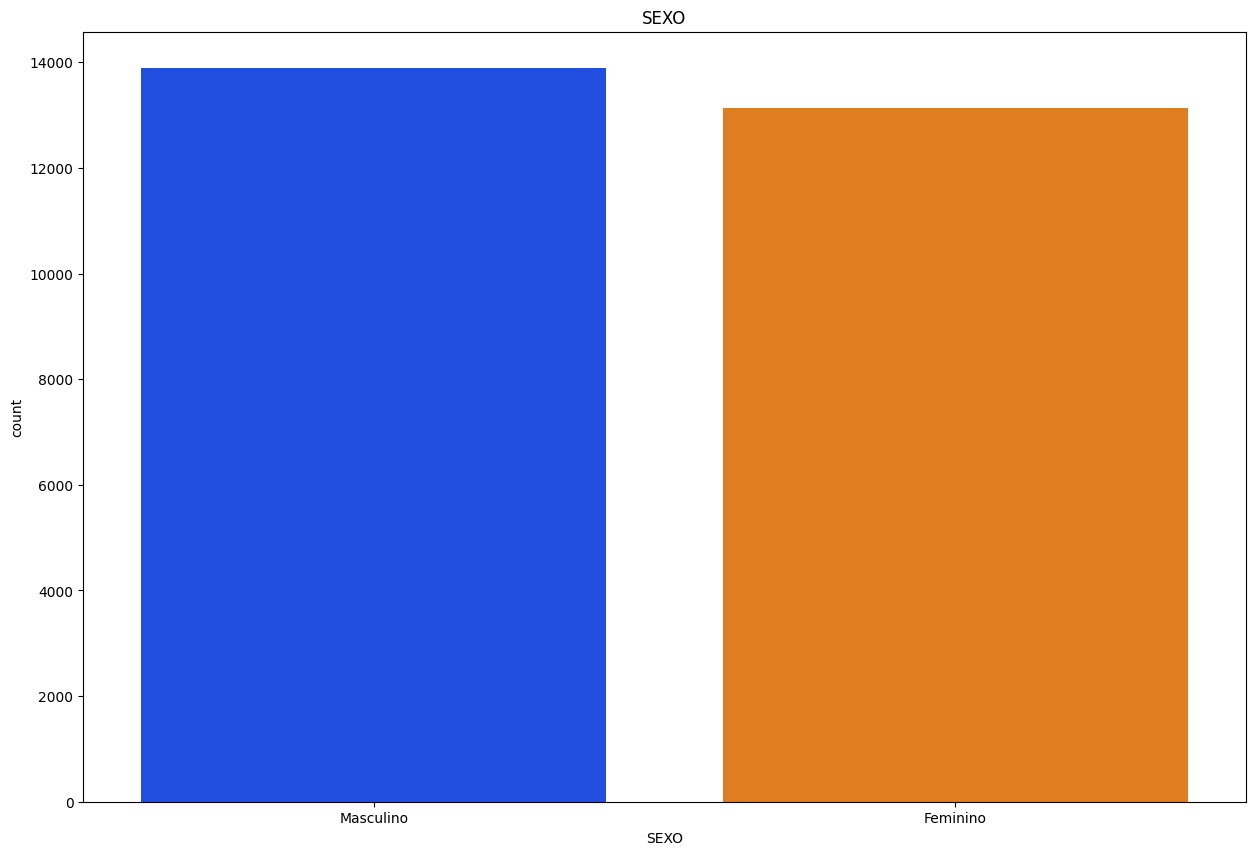

In [73]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))

sns.countplot(x='SEXO', hue='SEXO', data=sinasc, ax=axes, palette='bright', legend=False)
axes.set_title('SEXO')

plt.show()

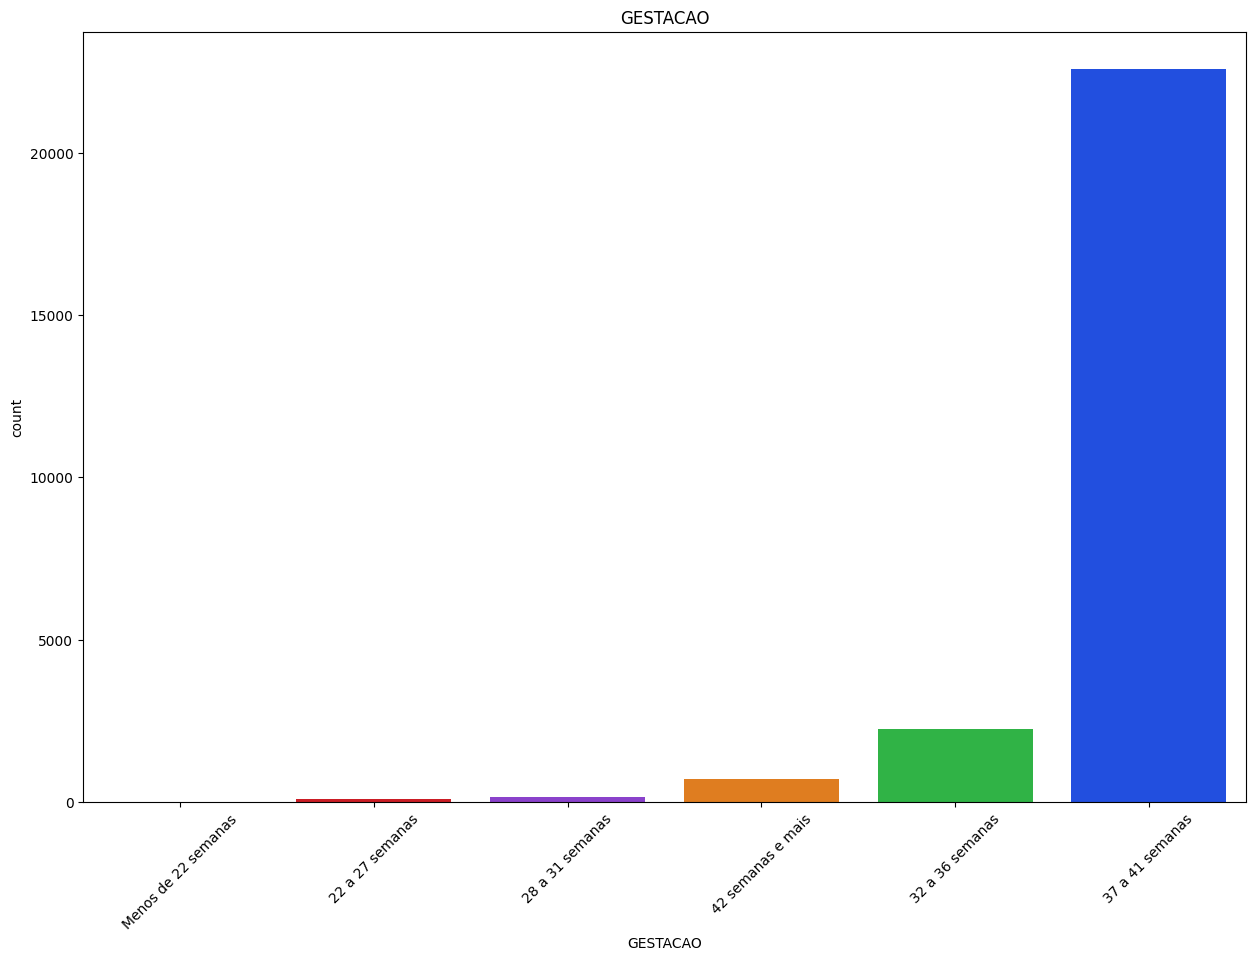

In [95]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))

order = sinasc['GESTACAO'].value_counts(ascending=True).index

sns.countplot(x='GESTACAO', hue='GESTACAO', data=sinasc, ax=axes, palette='bright', legend=False, order=order)
axes.set_xticks(axes.get_xticks())
axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
axes.set_title('GESTACAO')

plt.show()

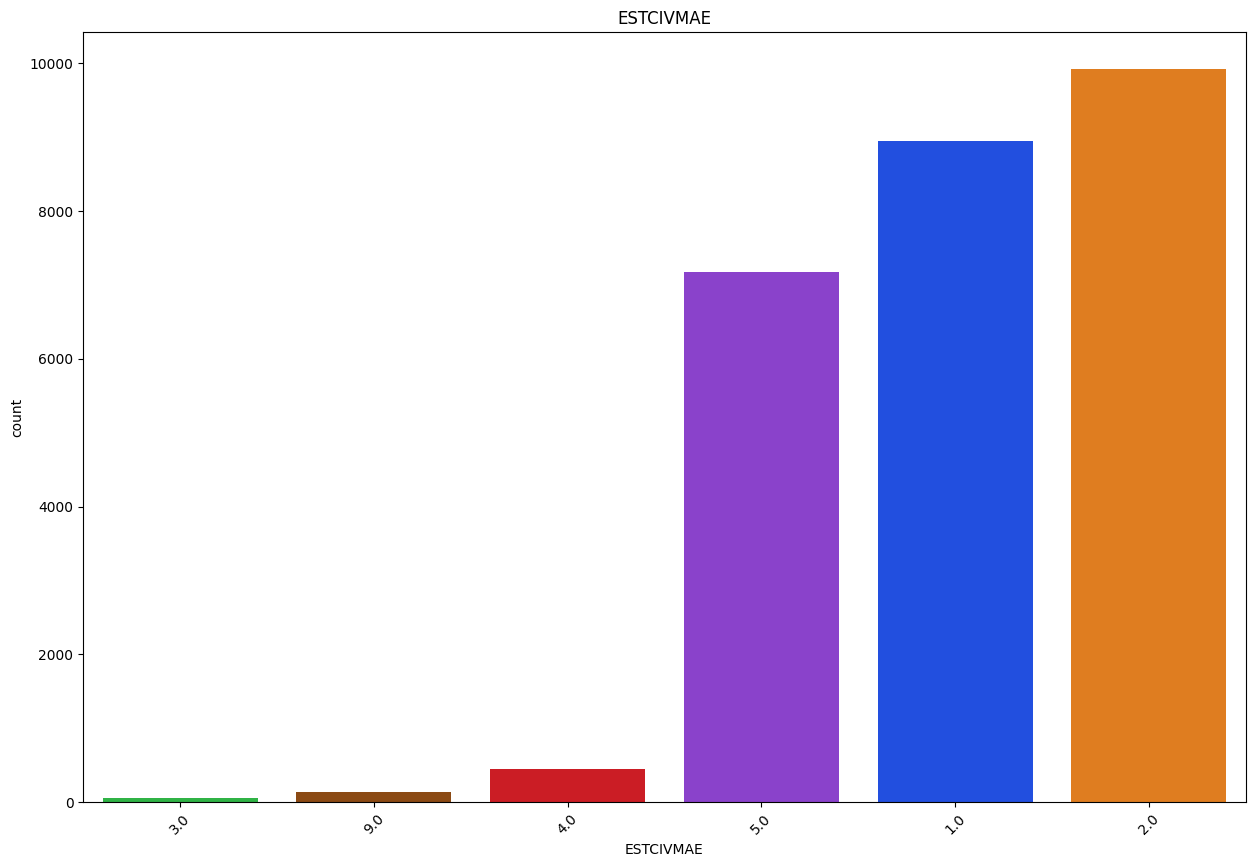

In [97]:
fig, axes = plt.subplots(1, 1, figsize=(15, 10))

order = sinasc['ESTCIVMAE'].value_counts(ascending=True).index

sns.countplot(x='ESTCIVMAE', hue='ESTCIVMAE', data=sinasc, ax=axes, palette='bright', legend=False, order=order)
axes.set_xticks(axes.get_xticks())
axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

axes.set_title('ESTCIVMAE')

plt.show()


#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [87]:
apgar5_consultas = sinasc.groupby('CONSULTAS')['APGAR5'].mean().reset_index()

apgar5_consultas

,CONSULTAS,APGAR5
0,1,8.981481
1,2,9.057395
2,3,9.154440
3,4,9.207188
4,9,8.860000


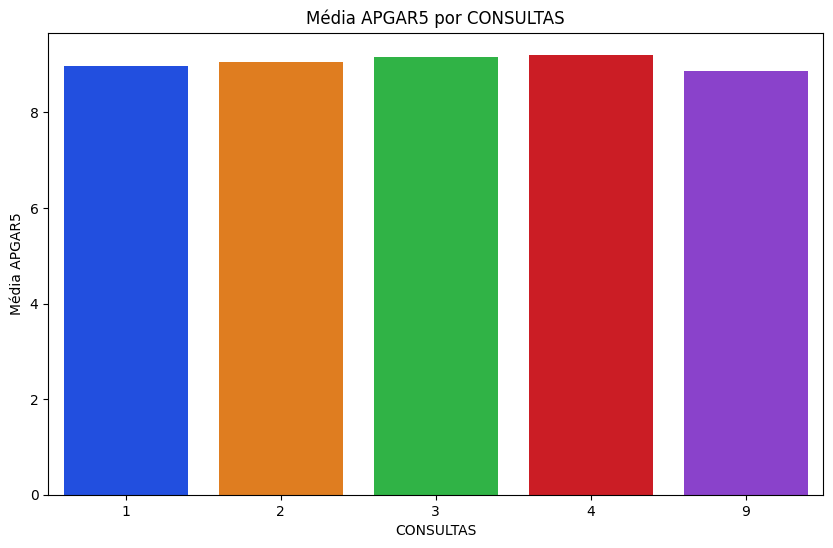

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CONSULTAS', y='APGAR5', data=apgar5_consultas, hue='CONSULTAS', palette='bright', legend=False)
plt.title('Média APGAR5 por CONSULTAS')
plt.xlabel('CONSULTAS')
plt.ylabel('Média APGAR5')

plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

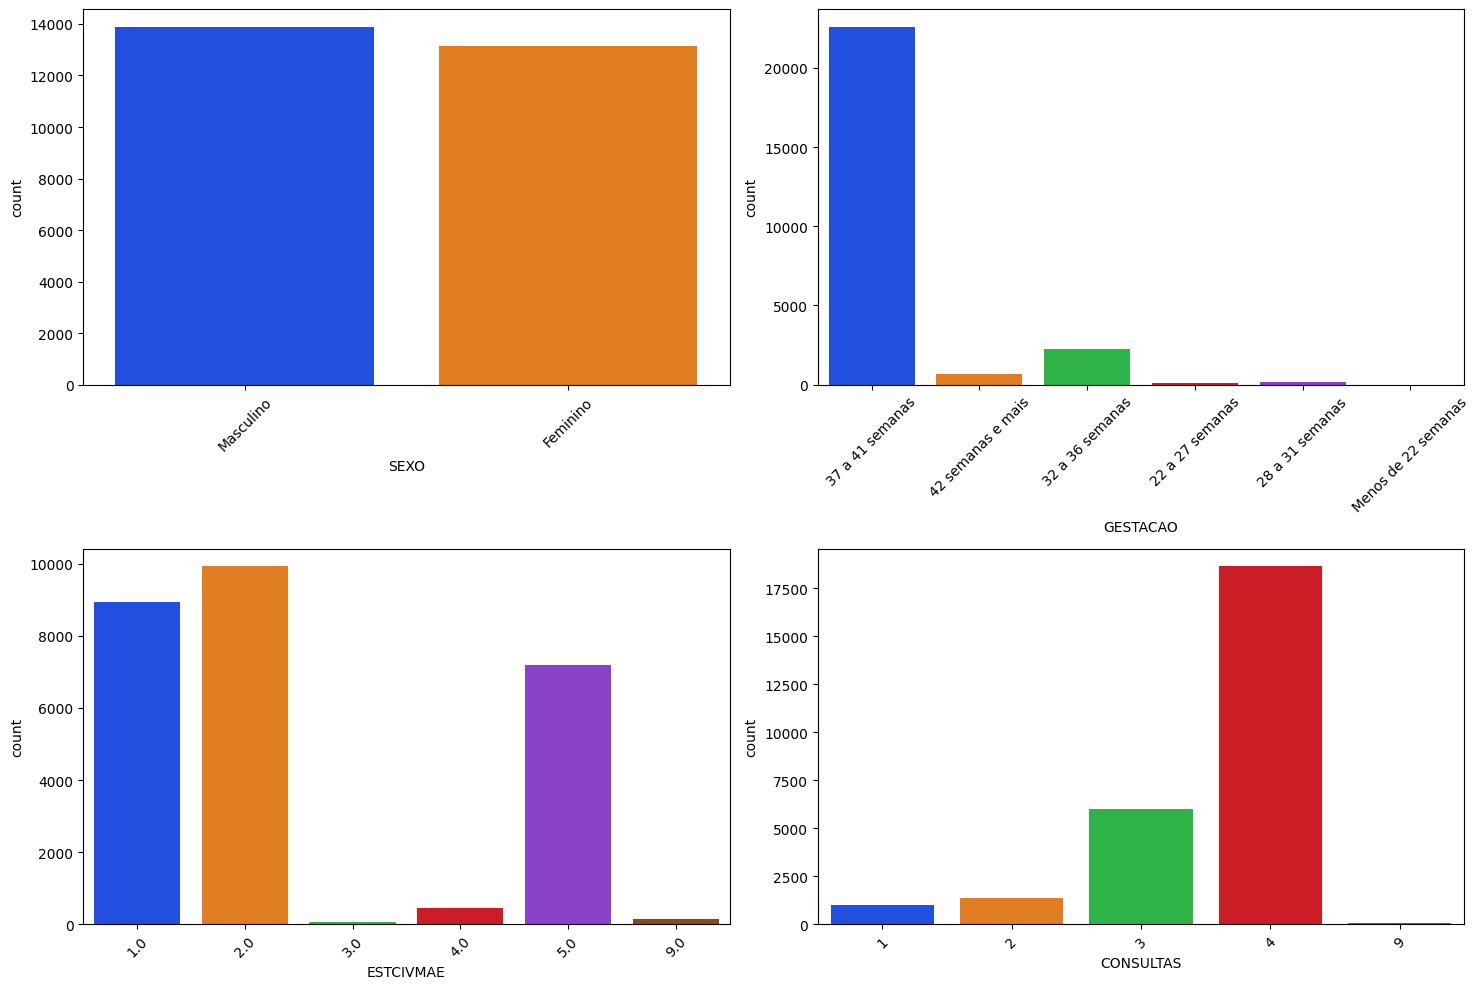

In [105]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax in axes.flat:
    sns.countplot(ax = axes[0,0], x='SEXO', hue='SEXO', data=sinasc, palette='bright', legend=False)
    sns.countplot(ax = axes[0,1], x='GESTACAO', hue='GESTACAO', data=sinasc, palette='bright', legend=False)
    sns.countplot(ax = axes[1,0], x='ESTCIVMAE', hue='ESTCIVMAE', data=sinasc, palette='bright', legend=False)
    sns.countplot(ax = axes[1,1], x='CONSULTAS', hue='CONSULTAS', data=sinasc, palette='bright', legend=False)

    ticks = ax.get_xticks()
    labels = ax.get_xticklabels()

    ax.xaxis.set_major_locator(FixedLocator(ticks))
    ax.xaxis.set_major_formatter(FixedFormatter([label.get_text() for label in labels]))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


plt.tight_layout()
plt.show()